In [7]:
import pandas as pd
import sqlite3

# Load CSV
superstore = pd.read_csv("SampleSuperstore.csv", encoding="latin1")
print("First 5 rows:")
print(superstore.head())

# Save to SQLite
conn = sqlite3.connect("superstore.db")
superstore.to_sql("Orders", conn, if_exists="replace", index=False)
conn.close()
print("Saved to superstore.db")

First 5 rows:
        Ship Mode    Segment        Country             City       State  \
0    Second Class   Consumer  United States        Henderson    Kentucky   
1    Second Class   Consumer  United States        Henderson    Kentucky   
2    Second Class  Corporate  United States      Los Angeles  California   
3  Standard Class   Consumer  United States  Fort Lauderdale     Florida   
4  Standard Class   Consumer  United States  Fort Lauderdale     Florida   

   Postal Code Region         Category Sub-Category     Sales  Quantity  \
0        42420  South        Furniture    Bookcases  261.9600         2   
1        42420  South        Furniture       Chairs  731.9400         3   
2        90036   West  Office Supplies       Labels   14.6200         2   
3        33311  South        Furniture       Tables  957.5775         5   
4        33311  South  Office Supplies      Storage   22.3680         2   

   Discount    Profit  
0      0.00   41.9136  
1      0.00  219.5820  
2     

In [9]:
# Connect and Check
import sqlite3
import pandas as pd

conn = sqlite3.connect("superstore.db")
cursor = conn.cursor()
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
tables = cursor.fetchall()
print("Tables:", [t[0] for t in tables])
conn.close()

Tables: ['Orders']


In [11]:
# Basic Query
conn = sqlite3.connect("superstore.db")
df = pd.read_sql_query("SELECT * FROM Orders LIMIT 5;", conn)
print("First 5 orders:")
display(df)
conn.close()

First 5 orders:


,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [13]:
# Sales by Region
conn = sqlite3.connect("superstore.db")
df = pd.read_sql_query("""
    SELECT Region, SUM(Sales) as TotalSales
    FROM Orders
    GROUP BY Region
    ORDER BY TotalSales DESC;
""", conn)
print("Sales by region:")
display(df)
conn.close()

Sales by region:


,Region,TotalSales
0,West,725457.8245
1,East,678781.2400
2,Central,501239.8908
3,South,391721.9050


In [15]:
# Top Products by Profit
conn = sqlite3.connect("superstore.db")
df = pd.read_sql_query("""
    SELECT "Product Name", SUM(Profit) as TotalProfit
    FROM Orders
    GROUP BY "Product Name"
    ORDER BY TotalProfit DESC
    LIMIT 5;
""", conn)
print("Top 5 products by profit:")
display(df)
conn.close()

Top 5 products by profit:


,"""Product Name""",TotalProfit
0,Product Name,286397.0217


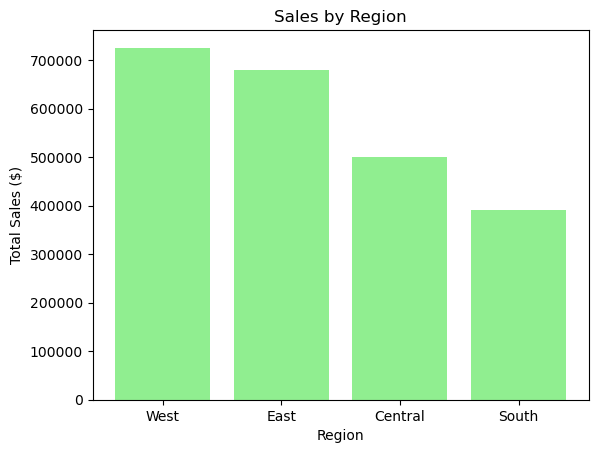

In [17]:
# Visual
import matplotlib.pyplot as plt

conn = sqlite3.connect("superstore.db")
df = pd.read_sql_query("""
    SELECT Region, SUM(Sales) as TotalSales
    FROM Orders
    GROUP BY Region
    ORDER BY TotalSales DESC;
""", conn)
plt.bar(df["Region"], df["TotalSales"], color="lightgreen")
plt.title("Sales by Region")
plt.xlabel("Region")
plt.ylabel("Total Sales ($)")
plt.show()
conn.close()

In [19]:
# Summary
print("SQL Mini-Project: Analyzed Superstore sales by region and product.")

SQL Mini-Project: Analyzed Superstore sales by region and product.
